# Comunicate Data Finding
## Bike Sharing data Analysis

### Investigation Overview
In this investigation, I wanted to look at the characteristics of bike sharing. The main focus was on the number of bikers, the most sesons bikers used bike sharing, tempreuture, 
### Dataset Overview
The data consisted of users and columns of months, years, seasons. and also include temp, humadity, weathersit, as well as additional measurements such as atemp, holyday, weekday, weekend. 

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## wrangling data

### Gathering Data

In [242]:
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [243]:
df_bike.shape

(731, 16)

### Assessing Data

## Structure of data set
##### instant: record index
##### dteday : date
##### season : season (1:springer, 2:summer, 3:fall, 4:winter)
##### yr : year (0: 2011, 1:2012)
##### mnth : month ( 1 to 12)
##### hr : hour (0 to 23)
##### holiday : weather day is holiday or not (extracted from [Web Link])
##### weekday : day of the week
##### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
##### weathersit :
###### 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
###### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
##### temp : Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
##### atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
##### hum: Normalized humidity. The values are divided to 100 (max)
##### windspeed: Normalized wind speed. The values are divided to 67 (max)
##### casual: count of casual users
##### registered: count of registered users
##### cnt: count of total rental bikes including both casual and registered

In [244]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [245]:
sum(df_bike.dteday.duplicated())

0

In [246]:
len(df_bike)

731

### What is the structure of the dataset?
There are 731 rows in the dataset with 15 columns, and different variable types like (int - float - object) but the most type are numeric.


## Observations

#### 1- The data type in (dteday)  column is not a datetime 
#### 2- No need to have 2 columns for temretures 
#### 3- No need to have 2 columns for casual and regestered users
#### 4- Rename (cnt) column to (users)
#### 5- instead of having 3 columns (holiday, weekday, workingday) replace it with one column

### Cleaning Data

In [247]:
# Make copie of the dataframe for cleaning

df_bike_clean= df_bike.copy()

#### Dfine:  Change the data type in (dteday)  column to datetime  

#### CODE

In [248]:
df_bike_clean['dteday'] = pd.to_datetime(df_bike_clean['dteday'], format = "%Y-%m-%d %H:%M:%S")

#### TEST

In [249]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Define:  No need to have 2 columns for temretures , Delete (atemp) column and keep (temp)
#### No need to have 2 columns for casual and regestered users drop them 

#### CODE

In [250]:
df_bike_clean=df_bike_clean.drop(['atemp','casual','registered'], 1)

#### TEST

In [251]:
 df_bike_clean.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Defone: Rename (cnt) column to (users)

#### CODE

In [252]:
df_bike_clean.rename(columns={'cnt':'users'}, inplace=True)

#### TEST

In [253]:
 df_bike_clean.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'users'],
      dtype='object')

#### Define: change the data type of holiday from integer to string

In [254]:
df_bike_clean.workingday = df_bike_clean.workingday.astype(str)

#### TEST

In [255]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  users       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 74.4+ KB


#### Define: instead of having 3 columns (holiday, weekday, workingday) replace it with one column

#### CODE

In [256]:
df_bike_clean.workingday=df_bike_clean.workingday.str.replace('1','workingday')
df_bike_clean.workingday=df_bike_clean.workingday.str.replace('0','holiday')


#### TEST

In [257]:
df_bike_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,users
0,1,2011-01-01,1,0,1,0,6,holiday,2,0.344167,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,holiday,2,0.363478,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,workingday,1,0.196364,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,workingday,1,0.200000,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,workingday,1,0.226957,0.436957,0.186900,1600


In [258]:
#Then drop unnessary column like 'holiday','weekday'
df_bike_clean=df_bike_clean.drop(['holiday','weekday'], 1)

In [259]:
# after that rename 'workingday' to 'days'
df_bike_clean.rename(columns={'workingday':'days'}, inplace=True)

#### TEST

In [260]:
df_bike_clean.head()

,instant,dteday,season,yr,mnth,days,weathersit,temp,hum,windspeed,users
0,1,2011-01-01,1,0,1,holiday,2,0.344167,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,holiday,2,0.363478,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,workingday,1,0.196364,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,workingday,1,0.200000,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,workingday,1,0.226957,0.436957,0.186900,1600


In [261]:
#Descriptive statistics for each column
np.round(df_bike_clean.describe(),2)

,instant,season,yr,mnth,weathersit,temp,hum,windspeed,users
count,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,1.40,0.50,0.63,0.19,4504.35
std,211.17,1.11,0.5,3.45,0.54,0.18,0.14,0.08,1937.21
min,1.00,1.00,0.0,1.00,1.00,0.06,0.00,0.02,22.00
25%,183.50,2.00,0.0,4.00,1.00,0.34,0.52,0.13,3152.00
50%,366.00,3.00,1.0,7.00,1.00,0.50,0.63,0.18,4548.00
75%,548.50,3.00,1.0,10.00,2.00,0.66,0.73,0.23,5956.00
max,731.00,4.00,1.0,12.00,3.00,0.86,0.97,0.51,8714.00


In [262]:
df_bike_clean.shape

(731, 11)

### What is the structure of the dataset?
after cleaning There are 731 rows in the dataset with 11 columns, and different variable types like (int - float - object) but the most type are numeric.
### What is/are the main feature(s) of interest in the dataset?
There are many like :
cnt,
season, 
weekday/holyday,
temp
### What features in the dataset will help support the investigation into the feature(s) of interest?
I think that the season, the total number of bikers(users) are the most important data to focus on.

## Univariate Exploration
(one variable only)

first I want to start with the number of bikers (users)

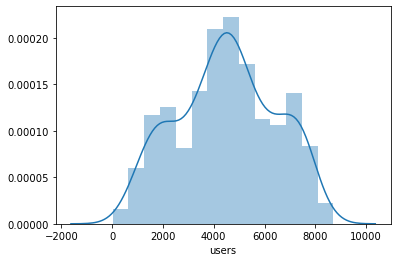

In [263]:
sb.distplot(df_bike_clean['users'])

Now, let's see the days count distribution weather it is holidays or workingdys

Text(0.5, 1.0, ' the days count distribution')

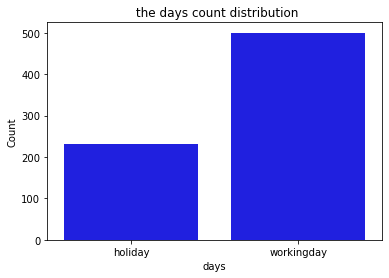

In [264]:
sb.countplot(data=df_bike_clean, x='days', color='blue');
plt.xlabel('days');
plt.ylabel('Count');
plt.title(' the days count distribution')

###### let's look at the year distribution
Our dataset contains year values 0 for representing 2011 and 2 for representing 2012.

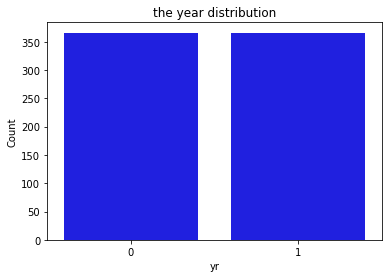

In [282]:
sb.countplot(data=df_bike_clean, x='yr', color='blue');
plt.xlabel('yr');
plt.ylabel('Count');
plt.title('the year distribution');

##### let's look at the months distribution

''

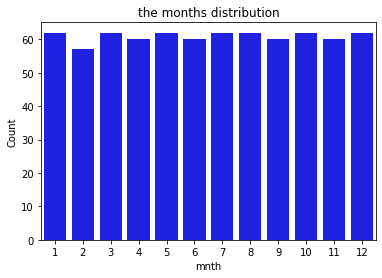

In [281]:
sb.countplot(data=df_bike_clean, x='mnth', color='blue');
plt.xlabel('mnth');
plt.ylabel('Count');
plt.title('the months distribution')
;

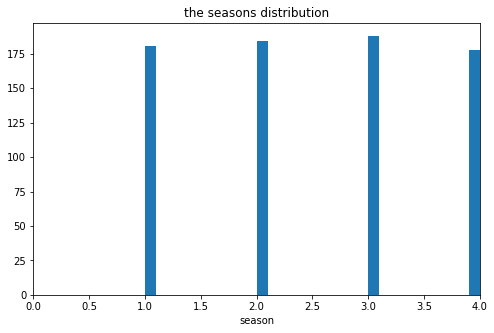

In [267]:
# plotting season on a standard scale
binsize = 0.1
bins = np.arange(0, df_bike_clean['season'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike_clean, x = 'season', bins = bins)
plt.xlim([0,4])
plt.xlabel('season')
plt.title('the seasons distribution')
plt.show()

In [268]:
#number of bikers on 2011
first_year = ((df_bike_clean['yr'] == 0))
print(first_year.sum())

365


In [269]:
#number of bikers on 2012
second_year = ((df_bike_clean['yr'] == 1))
print(second_year.sum())

366


In [270]:
df_bike_clean['yr'].value_counts()

1    366
0    365
Name: yr, dtype: int64

In [271]:
df_bike_clean['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [272]:
df_bike_clean.users.mean()

4504.3488372093025

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
all bikers count seem to be equal an all months, the lowest count in Feb. also the count of bikers in workingday is more than the count on hoidays, may be because alot of people using bikes to go to thier work.  the mean of users is 4504.3

## Bivariate Exploration
(2 different variable)

In [273]:
numeric_vars = ['season', 'yr', 'mnth', 'weathersit','temp','hum','windspeed','users']
categoric_vars = ['days']

correlation plot on all numeric variavles

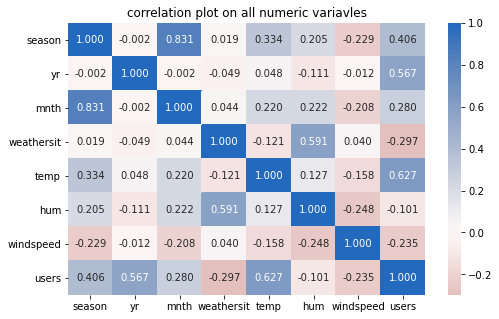

In [274]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_bike_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('correlation plot on all numeric variavles')
plt.show()

plot matrix: sample 500 users so that plots are clearer and they render faster

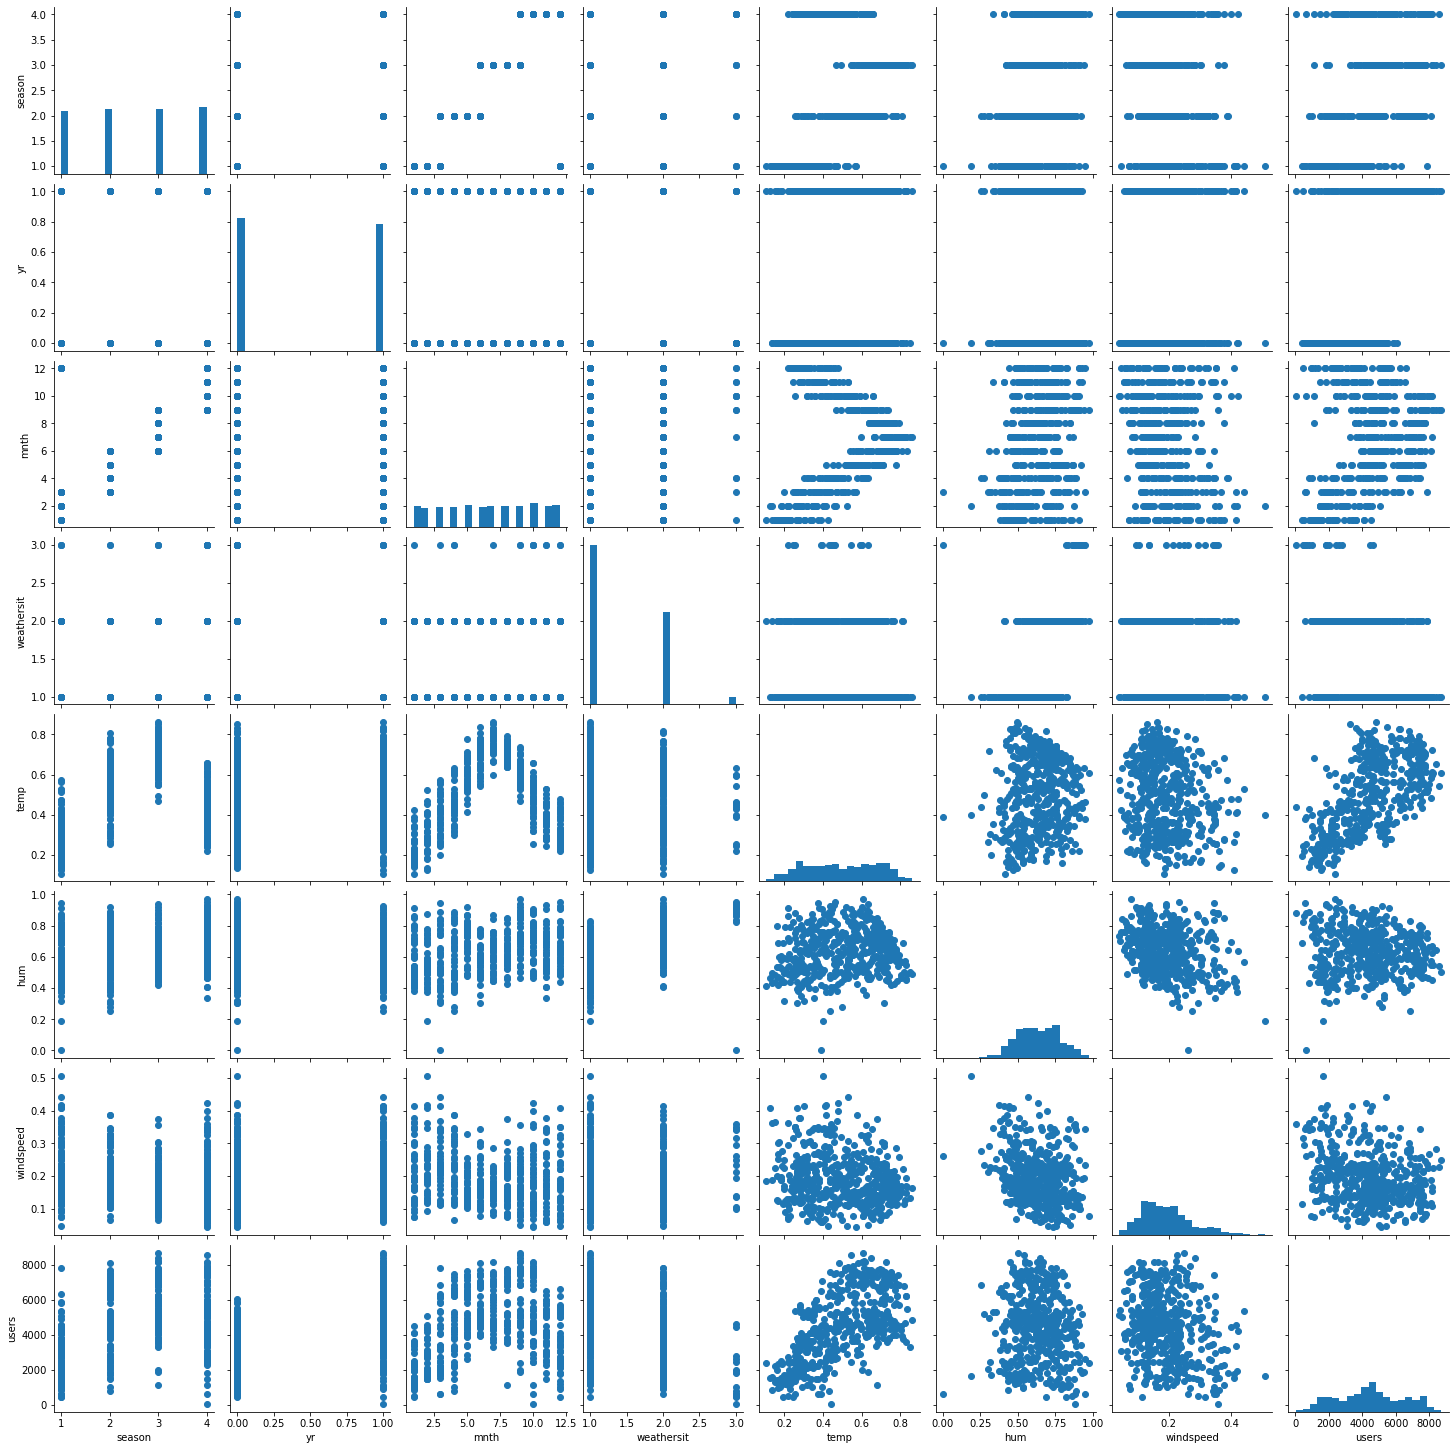

In [275]:
# plot matrix: sample 500 users so that plots are clearer and
# they render faster
samples = np.random.choice(df_bike_clean.shape[0], 500, replace = False)
df_bike_clean_samp =df_bike_clean.loc[samples,:]

g = sb.PairGrid(data = df_bike_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

distributions between average count of users and season, year, month, days, weathersit

Text(0.5, 1.0, 'distributions between average count of users and season, year, month, days, weathersit')

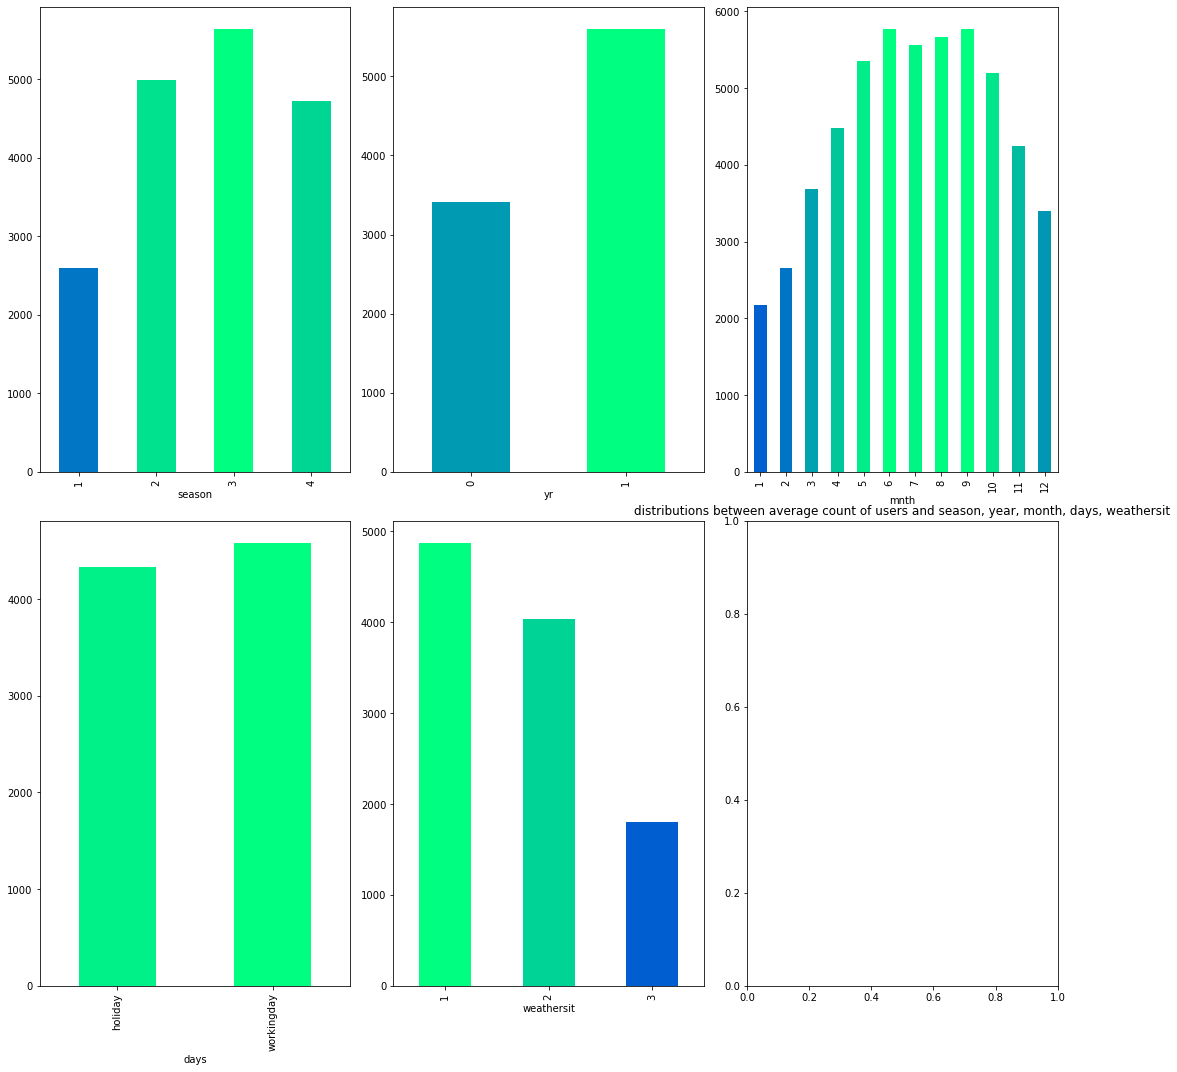

In [276]:

cm = plt.cm.get_cmap("winter")
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
df_bike_clean.groupby("season").mean()["users"].plot(ax=ax[0,0], kind="bar", color=cm(df_bike_clean.groupby("season").mean()["users"]/np.max(df_bike_clean.groupby("season").mean()["users"])))
df_bike_clean.groupby("yr").mean()["users"].plot(ax=ax[0,1], kind="bar", color=cm(df_bike_clean.groupby("yr").mean()["users"]/np.max(df_bike_clean.groupby("yr").mean()["users"])))
df_bike_clean.groupby("mnth").mean()["users"].plot(ax=ax[0,2], kind="bar", color=cm(df_bike_clean.groupby("mnth").mean()["users"]/np.max(df_bike_clean.groupby("mnth").mean()["users"])))
df_bike_clean.groupby("days").mean()["users"].plot(ax=ax[1,0], kind="bar", color=cm(df_bike_clean.groupby("days").mean()["users"]/np.max(df_bike_clean.groupby("days").mean()["users"])))
df_bike_clean.groupby("weathersit").mean()["users"].plot(ax=ax[1,1], kind="bar", color=cm(df_bike_clean.groupby("weathersit").mean()["users"]/np.max(df_bike_clean.groupby("weathersit").mean()["users"])))
plt.tight_layout()
plt.title('distributions between average count of users and season, year, month, days, weathersit')


from the above distribution we can recognize that the average count of users in fall season is the greatest than the other, spring season is the lowest number of bikers...

the average count of users in 2012 is greater than the average count of users in 2011

The average count of users in June and September isthe most, and the lowest average count of users in January.

 plot matrix of numeric features against categorical features.(season and days) and (users and days)

C:\Users\Fifa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

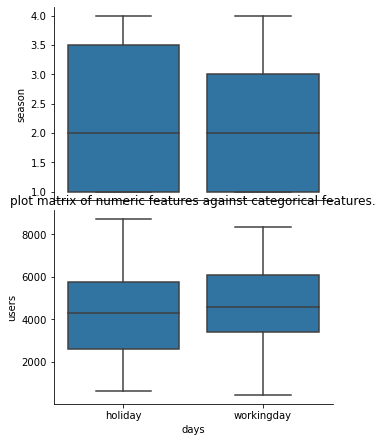

In [277]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(df_bike_clean.shape[0], 500, replace = False)
df_bike_clean_samp = df_bike_clean.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_bike_clean_samp, y_vars = ['season', 'users'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.title('plot matrix of numeric features against categorical features.')

plt.show();

## Multivariate Exploration
(3 or more variables )

Visualizing tepreture and users  across the seasons

[Text(0.5, 1.0, 'Season vs temp distribution of raidership users number')]

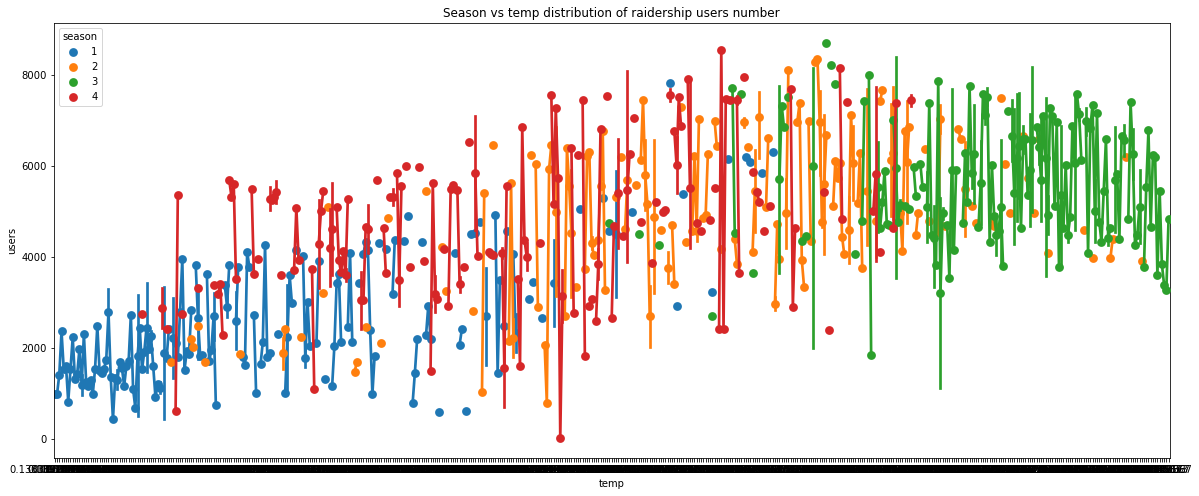

In [278]:
# Visualizing tepreture and users  across the seasons
fig,ax=plt.subplots(figsize=(20,8))
sb.pointplot(data=df_bike_clean[['temp','users','season']],x='temp',
             y='users',
             hue='season',ax=ax)
ax.set(title='Season vs temp distribution of raidership users number')

season (1:springer, 2:summer, 3:fall, 4:winter):
The above distribution shows the lowest users count for Spring season(blue), then count increases in summer season(orange).. This count reaches peak at the start of winter season, then falls afterwards.

In [279]:
days wise monthly distribution of users number

SyntaxError: invalid syntax (<ipython-input-279-a6b15161ba81>, line 1)

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sb.pointplot(data=df_bike_clean[['mnth','users','days']],x='mnth',y='users',
            hue='days',ax=ax)
ax.set(title='days wise monthly distribution of users number')

The above distribution shows the lowest unmber of bikers (users) on January on holiday, then count increases untill it reach on the highest on June and septemper on holiday while it decreas a littlebit between them .. after septemper the unmber of bikers (users) constantly decreases 

In [ ]:
correlation degree of all the numerical features wrt to the total count of users.

In [ ]:
# correlation degree of all the numerical features wrt to the total count of users.
df_bike_clean[["temp", "hum", "windspeed", "users"]].corr()["users"].plot(kind="bar", title="Correlation of variable features wrt to total number of bikes")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
From all above distribution, it is concluded that, the most of bikers using it during working days, windspeed and humadity dosenot effect number of bikers, lowest number of bers on January


In [280]:
!jupyter nbconvert communicate_data_findings_part2.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook communicate_data_findings_part2.ipynb to slides
[NbConvertApp] Writing 928244 bytes to communicate_data_findings_part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Fifa\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Fifa\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Fifa\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Fifa\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Fifa\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebo